# Adaptive Neural Network Development Portal #
This is the Jupyter notebook for the testing of the Adaptive Neural Network .

## 1 Test the ASE Molecular Dynamics Simulation ##
Test the ASE Molecular Dynamics Simulation Portal 

In [1]:
import sys
import os
sys.path.insert(0, "..")

from Utils.DirNav import get_project_dir

In [2]:
project_dir = get_project_dir()
model_path = os.path.join(project_dir, 'model', 'dftb')
sys.path.append(project_dir)


from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units

#from SubNetCalc import SubNetCalc
from CompileCalc import CompileCalc

from ASEDFTBMod import DftbMod
os.environ['DFTB_PREFIX'] = '/home/junmian/Applications/dftbplus/mio-1-1/'
os.environ['DFTB_COMMAND'] = '/home/junmian/Applications/dftbplus/_install/bin/dftb+'


    # Set path to the model

print(sys.path)

dftb_calc = DftbMod(
                         Hamiltonian_MaxAngularMomentum_='',
                         Hamiltonian_MaxAngularMomentum_O='"p"',
                         Hamiltonian_MaxAngularMomentum_H='"s"',
                         Hamiltonian_MaxAngularMomentum_C='"p"',
                         Hamiltonian_MaxAngularMomentum_N='"p"',
                         )

anal_calc = CompileCalc(dftb_calc)
anal_calc.import_model(model_path,['H', 'O', 'N', 'C'],
'at_idx_map.pkl', 'Gparam_dict.pkl')

from ase.io import read, write
glycine_test = read(os.path.join(project_dir, 'Calculator', 'glycine.xyz'))
print(glycine_test.get_chemical_symbols())


Using TensorFlow backend.


['..', '', '/home/junmian/Applications/YeltsinNet/Calculator', '/home/junmian/Applications/YeltsinNet/YeltsinNet', '/home/junmian/Applications/YeltsinNet', '/home/junmian/Coding_Prac/ASE_ANI-master/lib', '/home/junmian/anaconda3/envs/tensorflow/lib/python36.zip', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/lib-dynload', '/home/junmian/.local/lib/python3.6/site-packages', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/extensions', '/home/junmian/.ipython', '/home/junmian/Applications/YeltsinNet']
Successfully Imported the training model
['C', 'O', 'C', 'H', 'H', 'N', 'H', 'H', 'O', 'H']


In [3]:
from ase.io.trajectory import Trajectory

## MD Test 1: Running Molecular Dynamics Simulation Test ##
Ran the molecular dynamics simulation for 1000 steps, each step has a time step of 2 fs, using VelocityVerlet algorithm, so should be NVE. 


In [4]:



# Set up a crystal


# Describe the interatomic interactions with the Effective Medium Theory
glycine_test.set_calculator(anal_calc)
# Set the momenta corresponding to T=300K
#MaxwellBoltzmannDistribution(glycine_test, 300 * units.kB)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(glycine_test, 2 * units.fs)  # 5 fs time step.
traj = Trajectory('glycine_test.traj', 'w', glycine_test)
dyn.attach(traj.write)

def printenergy(a):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))

    
    

# Now run the dynamics
printenergy(glycine_test)
for i in range(1000):
    dyn.run(1)
    print("Step ", i)

Energy per atom: Epot = -766.449eV  Ekin = 0.000eV (T=  0K)  Etot = -766.449eV
Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12
Step  13
Step  14
Step  15
Step  16
Step  17
Step  18
Step  19
Step  20
Step  21
Step  22
Step  23
Step  24
Step  25
Step  26
Step  27
Step  28
Step  29
Step  30
Step  31
Step  32
Step  33
Step  34
Step  35
Step  36
Step  37
Step  38
Step  39
Step  40
Step  41
Step  42
Step  43
Step  44
Step  45
Step  46
Step  47
Step  48
Step  49
Step  50
Step  51
Step  52
Step  53
Step  54
Step  55
Step  56
Step  57
Step  58
Step  59
Step  60
Step  61
Step  62
Step  63
Step  64
Step  65
Step  66
Step  67
Step  68
Step  69
Step  70
Step  71
Step  72
Step  73
Step  74
Step  75
Step  76
Step  77
Step  78
Step  79
Step  80
Step  81
Step  82
Step  83
Step  84
Step  85
Step  86
Step  87
Step  88
Step  89
Step  90
Step  91
Step  92
Step  93
Step  94
Step  95
Step  96
Step  97
Step  98
Step  99
Step  100
Step  101
Step  102
S

Step  823
Step  824
Step  825
Step  826
Step  827
Step  828
Step  829
Step  830
Step  831
Step  832
Step  833
Step  834
Step  835
Step  836
Step  837
Step  838
Step  839
Step  840
Step  841
Step  842
Step  843
Step  844
Step  845
Step  846
Step  847
Step  848
Step  849
Step  850
Step  851
Step  852
Step  853
Step  854
Step  855
Step  856
Step  857
Step  858
Step  859
Step  860
Step  861
Step  862
Step  863
Step  864
Step  865
Step  866
Step  867
Step  868
Step  869
Step  870
Step  871
Step  872
Step  873
Step  874
Step  875
Step  876
Step  877
Step  878
Step  879
Step  880
Step  881
Step  882
Step  883
Step  884
Step  885
Step  886
Step  887
Step  888
Step  889
Step  890
Step  891
Step  892
Step  893
Step  894
Step  895
Step  896
Step  897
Step  898
Step  899
Step  900
Step  901
Step  902
Step  903
Step  904
Step  905
Step  906
Step  907
Step  908
Step  909
Step  910
Step  911
Step  912
Step  913
Step  914
Step  915
Step  916
Step  917
Step  918
Step  919
Step  920
Step  921
Step  922


## Print the Test Energy Results ##
Plot both the potential energy, the kinetic energy and the total energy. All units are in ase units of eV and angstrom. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def get_potential_energy_arr(traj):
    """Read the ase trajectory and plot the energy 
    
    """
    n_samples = len(traj)
    ke_arr = np.zeros(n_samples)
    pe_arr = np.zeros(n_samples)
    for i in np.arange(n_samples):
        ke_arr[i] = traj[i].get_potential_energy()
        pe_arr[i] = traj[i].get_kinetic_energy()
    
    return ke_arr, pe_arr

def print_md_energy(ke_arr_input, pe_arr_input, start_step):
    """Print the MD energy values from start_step
    
    
    """
    
    
    n_samples = len(ke_arr_input)
    
    if start_step > n_samples:
        raise ValueError("print_md_energy: start_step is more than the md step")
    index_arr_input = np.arange(n_samples)
    index_arr = index_arr_input[start_step:-1]
    ke_arr = ke_arr_input[start_step:-1]
    pe_arr = pe_arr_input[start_step:-1]
    
    
    
    total_arr = ke_arr + pe_arr
    
    ke_fig = plt.figure()
    plt.plot(index_arr, ke_arr, label='Kinetic Energy (eV)')
    plt.legend()
    plt.xlabel("Step ")
    plt.ylabel("Energy (eV)")
    plt.show()
    
    pe_fig = plt.figure()
    plt.plot(index_arr, pe_arr, label='Potential Energy (eV)')
    plt.legend()
    plt.xlabel("Step ")
    plt.ylabel("Energy (eV)")
    plt.show()
    
    
    total_fig = plt.figure()
    plt.plot(index_arr, total_arr, label='Total Energy (eV)')
    plt.legend()
    plt.xlabel("Step ")
    plt.ylabel("Energy (eV)")
    plt.show()

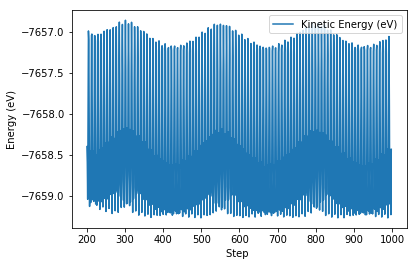

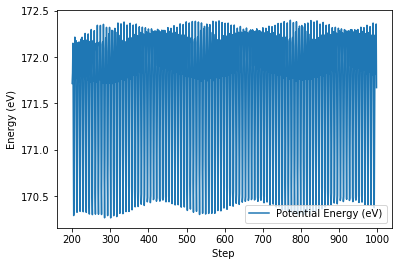

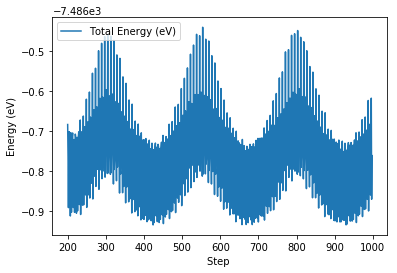

In [30]:
from ase.io import read
import matplotlib.pyplot as plt
import numpy as np
glycine_md_traj = Trajectory("glycine_test.traj", 'r')

ke_arr, pe_arr = get_potential_energy_arr(glycine_md_traj)
print_md_energy(ke_arr, pe_arr, 200)
    

## Test 2: Same MD simulation but run 1000 steps at once. 

In [32]:
# Describe the interatomic interactions with the Effective Medium Theory
glycine_test.set_calculator(anal_calc)
# Set the momenta corresponding to T=300K
#MaxwellBoltzmannDistribution(glycine_test, 300 * units.kB)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(glycine_test, 2 * units.fs)  # 5 fs time step.
traj = Trajectory('glycine_test_2.traj', 'w', glycine_test)
dyn.attach(traj.write, interval=10)

printenergy(glycine_test)
dyn.run(1000)

Energy per atom: Epot = -765.927eV  Ekin = 17.058eV (T=131964K)  Etot = -748.869eV


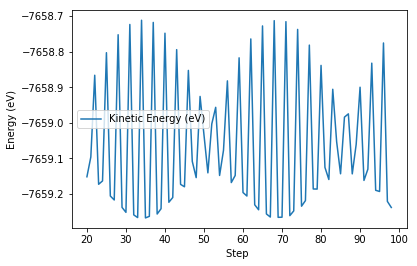

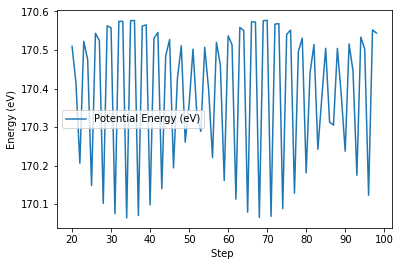

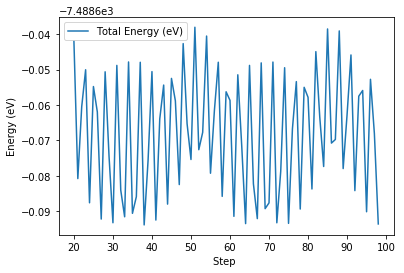

In [34]:
glycine_md_traj = Trajectory("glycine_test_2.traj", 'r')

ke_arr, pe_arr = get_potential_energy_arr(glycine_md_traj)
print_md_energy(ke_arr, pe_arr, 20)

## Using the analytical calculator for Geometric Optimization ##

In [31]:
from ase.optimize import BFGS, LBFGS
glycine_test.set_calculator(anal_calc)
dyn = LBFGS(glycine_test)
dyn.run(fmax=0.001)



       Step     Time          Energy         fmax
LBFGS:    0 14:57:59    -7657.249249       14.5905
LBFGS:    1 14:58:01    -7658.328686       11.6332
LBFGS:    2 14:58:03    -7659.068095        6.0282
LBFGS:    3 14:58:04    -7659.239334        2.6965
LBFGS:    4 14:58:06    -7659.267169        0.3893
LBFGS:    5 14:58:07    -7659.267820        0.0208
LBFGS:    6 14:58:09    -7659.267822        0.0012
LBFGS:    7 14:58:11    -7659.267822        0.0001


True

## Demo of Using ASE EMT Calculator For MD Simulation ##

In [ ]:
"""Demonstrates molecular dynamics with constant energy."""

from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units

# Use Asap for a huge performance increase if it is installed
use_asap = False

if use_asap:
    from asap3 import EMT
    size = 10
else:
    from ase.calculators.emt import EMT
    size = 3
    
# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol='Cu',
                          size=(size, size, size),
                          pbc=True)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.set_calculator(EMT())

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, 300 * units.kB)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 5 * units.fs)  # 5 fs time step.


def printenergy(a):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))

# Now run the dynamics
printenergy(atoms)
for i in range(20):
    dyn.run(10)
    printenergy(atoms)

In [ ]:
glycine_test.set_calculator(EMT())
glycine_test.get_forces()

## Real Testing Part
## 0. Trajectory Files 

### Development Strategy: 
0. First Prototyping in one while for loops (one function), (just for prototyping). 

1. 

In [ ]:
# While in a batch 
traj_list = [] # Save all the trajectory files 

batch_traj = []
while in batch: 
    run_md_simulation()
    traj_list.append()
    # Or 
    traj_list.save_to_dir()
    
    randomly_select_configs(batch_traj)
    
    
    
    
    
    
    
    

# 
    
    

## 2. Find Disagreement between the ASE Prediction and the Energy ##
Define a function that is able to find the disagreement between Calculator prediction and energy and add those geometries of un-agreement into a batch.

## 3. Making the Update Training Session For the Neural Network Model 
Define a function that is able to retrain the model based on the batch of the disagreements. 

## 4.  Complete the For Loop in which the calculator adaptively run the molecular dynamics. ##

## 5. Check the Convergence Criteria of the calculator ##

## 6. Able to record and even able to visualize the molecular dynamics simulation. ## 
Possibly by nglview. 